## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

In [1]:
import numpy as np 
import pandas as pd

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
  
  <ul>
    <li> Preprocesamiento de datos en <code> sklearn.preprocessing </code> </li>
    <li> Algoritmos de Machine Learning en <code>sklearn.linear_model</code>, <code>sklearn.svm</code>, <code>sklearn.ensemble</code>, y muchos más.</li>
    <li> Evaluación de modelos en <code>sklearn.model_selection</code> y <code>sklearn.metrics</code> </li>
  </ul>
</div>

<div class="alert alert-success">
  Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Una estructura de datos esencial en scikit-learn es el <strong>Estimator</strong>
</div>

<img src="img/estimator.png" width="600" style="margin:0 auto;clear:both">

<img src="../vol/img/evaluation_flow.png">

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Para poder escoger el estimator apropiado una excelente guia es el <strong>cheatsheet</strong> siguiente, hecho por uno de los core-dev de scikit-learn.
</div>

<img src="../vol/img/ml_map.png" width="1000" style="margin:0 auto;clear:both">

## Implementemos un modelo simple de regresión primero

In [2]:
df = pd.read_csv('X_opening.csv')
df.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [3]:
y = df['worldwide_gross']       #target 
y.head()

0    2.783919e+09
1    9.634204e+08
2    8.796209e+08
3    1.084439e+09
4    2.600021e+08
Name: worldwide_gross, dtype: float64

In [4]:
X = df.drop('worldwide_gross',axis=1)          #features o datos de entrada 
X.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)   #Random state 1 es aleatorio 

In [6]:
print(len(X))
print(len(X_train))
print(len(X_test))

2190
1314
876


In [7]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0


In [8]:
from sklearn.linear_model import Lasso
model = Lasso()

In [9]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
predicted = model.predict(X_test)

In [11]:
predicted.shape

(876,)

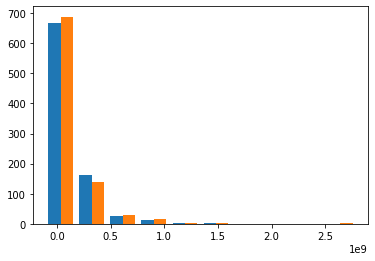

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>


<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [13]:
model.score(X_test,y_test)           #Se debe de corroborar a traves de graficas si el resultado es bueno o no en este caso parece bueno pero esta mal

0.7583742038599313

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src="../vol/img/datasaurus_dozen.png" width="800" style="margin:0 auto;clear:both">
<div class="alert alert-success">
<strong>Siempre visualiza tus resultados</strong>, aunque tengas un buen score de performance.
</div>



In [14]:
residuals = y_test - predicted

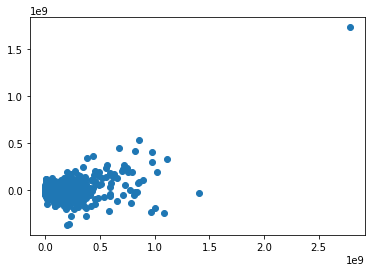

In [15]:
plt.scatter(y_test,residuals)     #Errores absolutos en dolares, mantiene una tendencia correcta, se analizan las diferencias entre la prediccion y los datos del target de prueba

In [16]:
ap_residuals = np.abs(residuals) / y_test       #Ahora veamos los errores en %

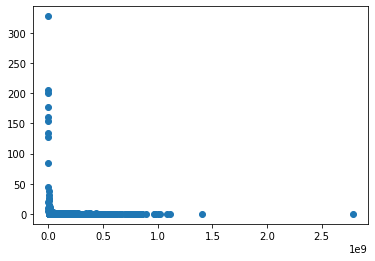

In [17]:
plt.scatter(y_test,ap_residuals)     #No se aprecia bien la distribucion de las peliculas pequeñas en 0 

In [18]:
lap_residuals = np.log(ap_residuals)      #Se crea esta grafica logaritmica para poder ver a detalle lo que no pudimos en la graf anterior 

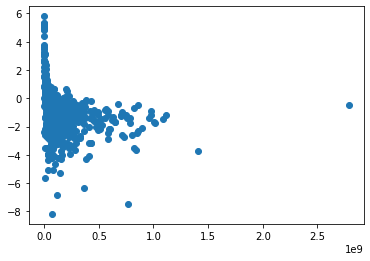

In [19]:
plt.scatter(y_test,lap_residuals)

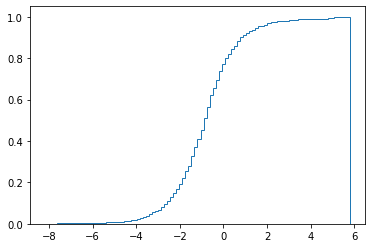

In [21]:
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);   #ahora hacemos una evaluación numerica de nuestros errores, con el ; no aparece todo el output
#Funcion cumulativa de la distribución de los errores 
#Apartir del 0 en x para atras podemos ver los %s de error en comparacion con los %s totales de los datos en y (Es decir 0% error para el 80% de los datos y 1 estoy a 10% de error para 60%)   Lo cual esta bien 

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

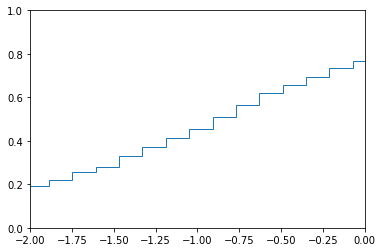

In [23]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);    #La misma grafica anterior pero de cerca
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))
#Modificamos la grafica, errores inferiores a 1% en x tengo 20% de los datos, errores inferiores a 10% en x tengo 40% en y errores inferiores a 100 tengo el 70% de los datos

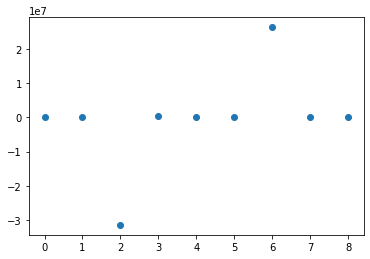

In [14]:
plt.scatter(np.arange(9),model.coef_)

In [32]:
X = pd.read_csv('X_opening.csv')

In [33]:
X = X.drop('worldwide_gross',axis=1)   

In [34]:
X = X.drop('budget',axis=1)   #Aun seguimos teniendo el budget que esta mal

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [36]:
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
model.score(X_test,y_test)          #Quitando la columna de budget, que se debio haber quitado desde un principio, nos manda un score de 82%

0.8263027314660778

In [38]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'imdb_score', 'opening_gross', 'screens'],
      dtype='object')

In [39]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)

('production_budget', 1.6915368476572068)
('title_year', 122086.44113429709)
('aspect_ratio', -44214913.32360193)
('duration.1', 369989.3325077885)
('cast_total_facebook_likes', -190.3193121209098)
('imdb_score', 24618469.43356747)
('opening_gross', 5.4290970983098115)
('screens', -16171.011973603821)
